# Project 6: I mammiferi depongolo le uova ?

I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse
classi, ovvero mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati.

Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il
progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.

Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi
meglio le classi fornite dal dataset.

Si richiede pertanto non solo di definire una metodologia per confrontare i risulati del clustering con la
classificazione attesa, ma anche di descrivere in modo sintetico le caratteristiche distintive di ciascun cluster
di specie prodotto dall'algoritmo oggetto della valutazione.

https://www.kaggle.com/uciml/zoo-animal-classification

## Summary

- Import Python Classes - importazione delle classi Python, SKLearn per il preprocessing dei dati e la computazione di ML e Matplotlib

- Import Data - importazione dei csv files riguardanti i dataset zoo e classes

- Dataset Exploration - esplorazione dei dataset importati

- Pipeline - definiamo una pipeline a tre stadi in cui eseguire: preprocessing, feat. trasformation del dataset zoo e clustering con uno degli algoritmi definiti
  - Preprocessing - processiamo i dati del dataset zoo
  - Features Transformation - trasformazione delle features del dataset zoo
  - Clustering - applicazione di un algoritmo di clustering sul dataset
  
- Pipeline Execution - eseguiamo la Pipeline sul dataset zoo e collezioniamo i risultati in un oggetto Evaluation

- View Results - mostriamo i risultati ottenuti

---

## Import Python classes

In [1]:
# Base libraries
import pandas as pd
import numpy as np

#Additional libraries
from tabulate import tabulate

In [2]:
#Preprocess Transform libraries
from sklearn import preprocessing as p
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [3]:
#ML libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

In [4]:
#ML Metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix

In [5]:
#Pipeline library
from sklearn.pipeline import Pipeline

In [6]:
#Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

---

## Import Data

- import zoo data
- import classes data

In [7]:
zoo = pd.read_csv('./data/zoo.csv')
classes = pd.read_csv('./data/class.csv')

In [8]:
#zoo = zoo.drop(['label'],axis=1)

---

## Dataset Exploration

- check dataframe shape
- check dataframe columns
- check dataframe contents
- check dataframe stats
- assess missing data
- assess outliers data

### Zoo Dataframe

In [9]:
print(zoo.shape)

(101, 18)


In [10]:
print(zoo.columns)

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')


In [11]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
display(zoo.describe().T)

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


#### Assess missing data

In [13]:
# Perform an assessment of how much missing data there is in each column of the dataset

null_ser = zoo.isnull().sum()

null_ser_perc = (zoo.isnull().sum()/len(zoo))*100

null_dict = {'num of missing':null_ser.values,'perc of missing':null_ser_perc}

zoo_null_df = pd.DataFrame(data=null_dict,index=null_ser.index)

zoo_null_df.sort_values(by='num of missing',ascending=False,inplace=True)

In [14]:
# Dataframe with Number of missings and % of missings for each columns (represented as inde

zoo_null_df

,num of missing,perc of missing
animal_name,0,0.0
hair,0,0.0
catsize,0,0.0
domestic,0,0.0
tail,0,0.0
legs,0,0.0
fins,0,0.0
venomous,0,0.0
breathes,0,0.0
backbone,0,0.0


#### Assess outliers data

<AxesSubplot:>

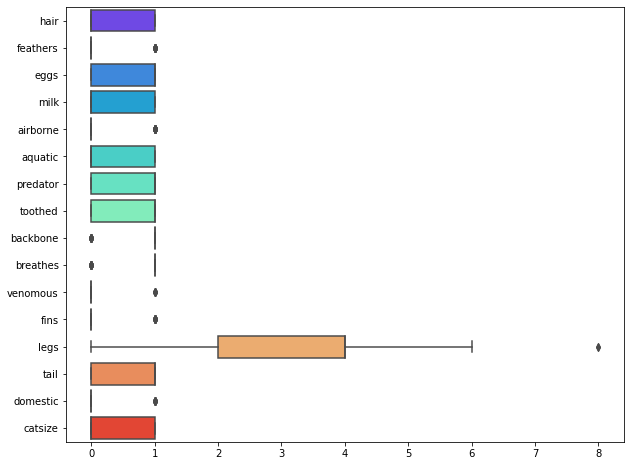

In [15]:
# Già il describe aveva evidenziato l'assenza di Outliers

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=zoo.loc[:,zoo.columns != 'class_type'], orient='h', palette='rainbow')

In [16]:
#IQR = np.percentile(zoo['backbone'], 75) - np.percentile(zoo['backbone'], 25)
#Q1 = np.percentile(zoo['backbone'], 25)
#Q3 = np.percentile(zoo['backbone'], 75)
#LB = Q1 - 1.5*IQR
#UB = Q3 + 1.5*IQR
#print(LB,UB)

### Classes Dataframe

In [17]:
print(classes.shape)

(7, 4)


In [18]:
print(classes.columns)

Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')


In [19]:
classes.head(10)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [20]:
#display(classes.describe().T)

#### Assess missing data

In [21]:
# Perform an assessment of how much missing data there is in each column of the dataset

null_ser = classes.isnull().sum()
null_ser_perc = (classes.isnull().sum()/len(classes))*100

null_dict = {'num of missing':null_ser.values, 'perc of missing': null_ser_perc}

classes_null_df = pd.DataFrame(data=null_dict, index=null_ser.index)

classes_null_df.sort_values(by='num of missing', ascending=False, inplace=True)

In [22]:
# Dataframe with Number of missings and % of missings for each columns (represented as index)

classes_null_df

,num of missing,perc of missing
Class_Number,0,0.0
Number_Of_Animal_Species_In_Class,0,0.0
Class_Type,0,0.0
Animal_Names,0,0.0


#### Assess outliers data

In [23]:
# Per il DataFrame classes non ha senso la ricerca

---

## Pipeline

Definiamo una pipeline a tre stadi in cui eseguire: preprocessing, feat. trasformation e clustering che precedentemente abbiamo eseguito sequenzialmente

- 1st stage: preprocessing
- 2nd stage: transforming
- 3th stage: clustering

Una volta eseguita la Pipeline abbiamo calcolato le statistiche di ciascun risultato e le abbiamo stampate

### Class preprocessing

Input:
- Zoo dataset

Preprocess:
- drop off columns not needed

Output:
- Zoo dataset preprocessed

In [24]:
class preprocessing(object):
    
    prep_data = None
    
    def __init__(self):
        prep_data = None
    
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X, Y=None):
        return X.drop(['animal_name','class_type'],axis=1)
    
    def fit_transform(self, X, Y=None):
        self.fit(X, Y)
        self.prep_data = self.transform(X, Y)
        return self.prep_data
    

### Class transforming

Input:
- Zoo dataset

Transformations:

- re-encode numerical features:
    - Standard Scaler
    - MinMax Scaler
- one hot encoding for legs column
    - yes
    - no
    
Output:
- Zoo dataset transformed

In [25]:
class transforming(object):

    scaler = None
    scaler_method = None
    ohe_legs=None
    transf_data=None
    
    def __init__(self, scaler, scaler_method, ohe_legs):
        
        self.scaler=scaler
        self.scaler_method = scaler_method
        self.ohe_legs=ohe_legs
    
    def fit(self, X, Y=None):
        
        return self
    
    def transform(self, X, Y=None):
        
        if self.ohe_legs:
            X_oneh = pd.get_dummies(X['legs'], prefix='legs')
            X_wo_legs = X[[x for x in X.columns if x != 'legs']] 
            X = X_wo_legs.join(X_oneh)
        else:
            pass
        
        self.scaler.fit(X)
        
        X = pd.DataFrame(self.scaler.transform(X))
            
        return X
    
    def fit_transform(self, X, Y=None):
        
        self.fit(X, Y)
        self.transf_data = self.transform(X, Y)
        
        return self.transf_data
    

### Class clustering

Input:
- ML object (KMeans, DBScan, AgglomerativeClustering)

Output:
- Prediction

In [26]:
class clustering(object):

    model = None
    
    def __init__(self, model):
        self.model=model
    
    def fit(self, X, Y=None):
        self.model.fit(X)
        return self
    
    def predict(self, X, Y=None):
        try:
            X = self.model.predict(X)
            return X
        except AttributeError:
            raise
    
    def fit_predict(self, X, Y=None):
        try:
            self.fit(X, Y)
            return self.predict(X, Y)
        except AttributeError:
            return self.model.fit_predict(X)


### Class evaluation

- Classe used to:
  - collect the output of the Pipeline in a dictionary
  - calculate score
  - view predictions

In [27]:
class evaluation(object):
    
    model_key = None
    classes_all = None
    zoo_all = None
    zoo_class_type = None   
    predictions = None
    
    def __init__(self, classes_all, zoo_all, zoo_class_type):
        
        # Init method
        self.classes_all = classes_all
        self.classes_all.rename(columns={'Class_Type': 'class_name', 'Class_Number': 'class_type'}, inplace=True)
        self.zoo_all = zoo_all
        self.zoo_class_type = zoo_class_type
        self.predictions = {}
        self.model_key = 0

    def add_prediction(self, model, scaler_method ,ohe_legs, prediction, scaler, transf_data):
        
        #self.model_key = str(model) +'_'+scaler_method+'_'+str(ohe_legs)
        self.model_key = self.model_key + 1
        score = self.calculate_score(self.zoo_class_type, prediction)
        self.predictions[self.model_key] = [prediction, model, scaler_method, ohe_legs, score, transf_data, scaler]
        
    def calculate_score(self, real, pred):
        
        return adjusted_rand_score(real, pred)
        
    def print_models_list(self):
        
        print(tabulate(sorted([[k,v[1],v[2],v[3],v[4]] for k,v in self.predictions.items()], key=lambda tup:tup[0],reverse=False),headers=['Model\'s Key','Model','Scaler Type','OHE','Adj Rand Score ']))

    def print_models_list_by_score(self):
        
        print(tabulate(sorted([[v[4],k,v[1],v[2],v[3]] for k,v in self.predictions.items()], key=lambda tup:tup[0],reverse=True),headers=['Adj Rand Score ','Model\'s Key','Model','Scaler Type','OHE']))
            
    def print_model_summary(self, model_key):

        #DA
        prediction = self.predictions[model_key][0]
        
        #Calculate Summary
        df = pd.concat([self.zoo_class_type, pd.Series(prediction, name='class_type_pred')], axis=1)
        df['count'] = 1

        df = pd.merge(df,self.classes_all,left_on='class_type',right_on='class_type')
        
        df = df[['class_name','class_type_pred','count']].groupby(['class_name','class_type_pred']).sum()
        df.reset_index(inplace=True)

        df_pivoted = df.pivot(index='class_name', columns=['class_type_pred'], values='count')
        
        df_stats = pd.DataFrame(columns=['class_name', 'cluster_nbr', 'amount', 'total'])
        
        for index, row in df_pivoted.iterrows():
            for col_index,col in enumerate(row.values):
                if col > 0:
                    df_stats = df_stats.append({'class_name': index, 'cluster_nbr': col_index, 'amount': int(col), 'total': int(row.sum()) } ,ignore_index=True)

        #Print Summary
        summary_rows = []
        for index, row in df_stats.iterrows():
            amount = row['amount']
            total = row['total']
            class_name = row['class_name']
            cluster_nbr = row['cluster_nbr']
            summary_rows.append( ['[{}/{}] of {}s have been put into Cluster Nbr. {} : ({:.1f}%)'.format(amount,total,class_name,cluster_nbr,(amount/total)*100)] )

        print(tabulate(summary_rows,headers=['Summary for Model: '+ str(self.predictions[model_key][1]) ] ) )
        
    def print_confusion_matrix(self, model_key):
        
        #DA
        prediction = self.predictions[model_key][0]
        
        df = pd.concat([self.zoo_class_type, pd.Series(prediction, name='class_type_pred')], axis=1)
        df['count'] = 1
        df = pd.merge(df,self.classes_all,left_on='class_type',right_on='class_type')
        df = df[['class_name','class_type','class_type_pred','count']].groupby(['class_name','class_type','class_type_pred']).sum()
        
        df.reset_index(inplace=True)
        
        df_pivoted = df.pivot(index='class_name', columns=['class_type_pred'], values='count')
        df_pivoted = df_pivoted.fillna(0)
        df_pivoted = df_pivoted.astype(int)
        
        print(df_pivoted)

    def print_countplot(self, model_key):
        
        #DA
        prediction = self.predictions[model_key][0]
        
        df = pd.concat([self.zoo_class_type, pd.Series(prediction, name='class_type_pred')], axis=1)
        df['count'] = 1
        df = pd.merge(df,self.classes_all,left_on='class_type',right_on='class_type')
        
        fig, ax = plt.subplots(figsize=(10,10))
        sns.countplot(x='class_type_pred', data=df, facecolor=(0, 0, 0, 0), linewidth=1, alpha=0.1)
        sns.countplot(x='class_type_pred', hue='class_name', data=df)
        
        ax.set(xlabel='Clusters Predicted', ylabel='Count')
        plt.legend(title = "Class Name")
        plt.show()

    def print_scatterplot(self, model_key):
        
        #DA
        prediction = self.predictions[model_key][0]
        trans_data = self.predictions[model_key][5]
        
        df_trans_data = pd.DataFrame(trans_data)
        
        pca = PCA(n_components=2)
        pca.fit(df_trans_data)
        pca_trans_data = pca.transform(df_trans_data)

        pca_trans_data = pd.DataFrame(pca_trans_data,columns=['PCA 1','PCA 2'])

        df_prediction = pd.DataFrame(prediction,columns=['pred'])
        df_prediction['pred'] = df_prediction['pred'].apply(str)

        pca_trans_data = pca_trans_data.join(df_prediction)

        fig, ax = plt.subplots(figsize=(10,10))
        sns.scatterplot(data=pca_trans_data, x='PCA 1', y='PCA 2', hue='pred')  
        
    def predict_animal_wdt(self, model_key, animal):

        #DA
        model = self.predictions[model_key][1]
        ohe_legs = self.predictions[model_key][3]

        #scaler = self.predictions[model_key][5]

        #Predict
        print(model.predict(animal))
        
    def predict_animal_ws(self, model_key, animal):

        #DA
        model = self.predictions[model_key][1]
        ohe_legs = self.predictions[model_key][3]
        scaler = self.predictions[model_key][6]

        #Prep
        animal = animal.drop(['animal_name','class_type'],axis=1)

        #OHE
        if ohe_legs:
            X_oneh = pd.get_dummies(animal['legs'], prefix='legs')
            X_wo_legs = animal[[x for x in animal.columns if x != 'legs']] 
            animal = X_wo_legs.join(X_oneh)
        else:
            pass

        #Scaler
        animal = scaler.transform(animal)

        #Predict
        print(model.predict(animal))
        

---

## Pipeline Execution

- Definiamo:
  - numero di clusters da ricercare nel dataset zoo
  - istanziamo gli oggetti implementanti gli algoritmi di clustering e li inseriamo in una lista (algorithms)
  - creiamo una lista per i metodi di scaler da utilizzare (scaler_methods)
  - creiamo una lista di scelte di esecuzione dell'OHE (ohe_legs)
  - istanziamo un oggetto evaluate per collezionare i risultati della Pipeline
  - definiamo ed eseguiamo la Pipeline sugli input espressi nelle liste definite

In [28]:
n_clusters = 7

In [29]:
kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state = 42)

In [30]:
affpropagation = AffinityPropagation(random_state=5)

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=4)

In [32]:
agglcluster = AgglomerativeClustering(n_clusters=n_clusters)

In [46]:
eval_ = evaluation(classes.copy(), zoo.copy(), zoo['class_type'])

In [47]:
algorithms = [kmeans,dbscan ,agglcluster]
scaler_methods = ['StandardScaler','MinMaxScaler']
ohe_legs = [True,False]

In [48]:
for alg in algorithms:
    for scaler_method in scaler_methods:
        for ohe in ohe_legs:
            
            if scaler_method == 'StandardScaler':
                scaler = p.StandardScaler()
            elif scaler_method == 'MinMaxScaler':
                scaler = p.MinMaxScaler()
            
            pipe_3 = Pipeline([
                ("preprocessing", preprocessing()),
                ("transforming", transforming(scaler,scaler_method,ohe)),
                ('clustering', clustering(alg))
            ])
            eval_.add_prediction(
                pipe_3.steps[2][1].model,
                pipe_3.steps[1][1].scaler_method,
                pipe_3.steps[1][1].ohe_legs,
                pipe_3.fit_predict(zoo),
                pipe_3.steps[1][1].scaler,
                pipe_3.steps[1][1].transf_data)

---

## View Results

- Visualizziamo la lista di tutti i modelli costruiti
- Visualizziamo classifica dei migliori modelli
- Visualizziamo la Tabella associata al modello selezionato
- Visualizziamo la Confusion Matrix
- Riduciamo le dimensioni usando e visualizziamo in 2D
- Proviamo il modello con una entry inserita manualmente: [0,1,1,0,...]

### Models' List

In [49]:
eval_.print_models_list()

  Model's Key  Model                                  Scaler Type     OHE      Adj Rand Score
-------------  -------------------------------------  --------------  -----  -----------------
            1  KMeans(n_clusters=7, random_state=42)  StandardScaler  True           0.844913
            2  KMeans(n_clusters=7, random_state=42)  StandardScaler  False          0.866478
            3  KMeans(n_clusters=7, random_state=42)  MinMaxScaler    True           0.72792
            4  KMeans(n_clusters=7, random_state=42)  MinMaxScaler    False          0.636196
            5  DBSCAN(min_samples=4)                  StandardScaler  True          -0.0664031
            6  DBSCAN(min_samples=4)                  StandardScaler  False         -0.0380654
            7  DBSCAN(min_samples=4)                  MinMaxScaler    True          -0.0664031
            8  DBSCAN(min_samples=4)                  MinMaxScaler    False         -0.0383998
            9  AgglomerativeClustering(n_clusters=7)  St

### Models' List by Score

In [50]:
eval_.print_models_list_by_score()

  Adj Rand Score     Model's Key  Model                                  Scaler Type     OHE
-----------------  -------------  -------------------------------------  --------------  -----
        0.866478               2  KMeans(n_clusters=7, random_state=42)  StandardScaler  False
        0.844913               1  KMeans(n_clusters=7, random_state=42)  StandardScaler  True
        0.789585               9  AgglomerativeClustering(n_clusters=7)  StandardScaler  True
        0.763394              11  AgglomerativeClustering(n_clusters=7)  MinMaxScaler    True
        0.72792                3  KMeans(n_clusters=7, random_state=42)  MinMaxScaler    True
        0.682877              12  AgglomerativeClustering(n_clusters=7)  MinMaxScaler    False
        0.679927              10  AgglomerativeClustering(n_clusters=7)  StandardScaler  False
        0.636196               4  KMeans(n_clusters=7, random_state=42)  MinMaxScaler    False
       -0.0380654              6  DBSCAN(min_samples=4) 

### Model' Summary

In [76]:
model_key = 4
eval_.print_model_summary(model_key)

Summary for Model: KMeans(n_clusters=7, random_state=42)
-------------------------------------------------------------------
[4/4] of Amphibians have been put into Cluster Nbr. 5 : (100.0%)
[17/20] of Birds have been put into Cluster Nbr. 1 : (85.0%)
[3/20] of Birds have been put into Cluster Nbr. 5 : (15.0%)
[8/8] of Bugs have been put into Cluster Nbr. 6 : (100.0%)
[13/13] of Fishs have been put into Cluster Nbr. 3 : (100.0%)
[7/10] of Invertebrates have been put into Cluster Nbr. 0 : (70.0%)
[1/10] of Invertebrates have been put into Cluster Nbr. 5 : (10.0%)
[2/10] of Invertebrates have been put into Cluster Nbr. 6 : (20.0%)
[19/41] of Mammals have been put into Cluster Nbr. 2 : (46.3%)
[22/41] of Mammals have been put into Cluster Nbr. 4 : (53.7%)
[1/5] of Reptiles have been put into Cluster Nbr. 3 : (20.0%)
[4/5] of Reptiles have been put into Cluster Nbr. 5 : (80.0%)


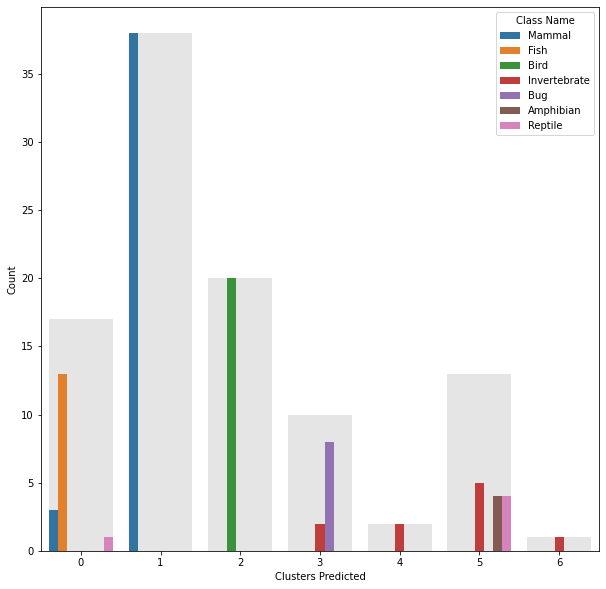

In [52]:
eval_.print_countplot(model_key)

### Confusion Matrix

In [75]:
model_key = 4
eval_.print_confusion_matrix(model_key)

class_type_pred  0   1   2   3   4  5  6
class_name                              
Amphibian        0   0   0   0   0  4  0
Bird             0  17   0   0   0  3  0
Bug              0   0   0   0   0  0  8
Fish             0   0   0  13   0  0  0
Invertebrate     7   0   0   0   0  1  2
Mammal           0   0  19   0  22  0  0
Reptile          0   0   0   1   0  4  0


## Scatterplot

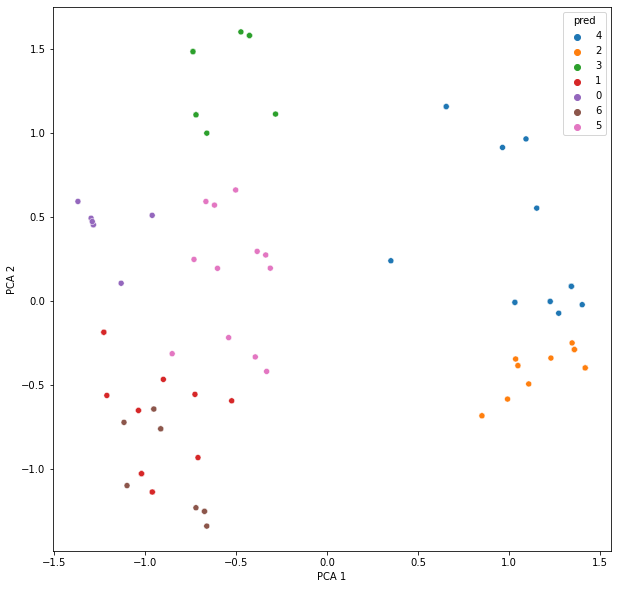

In [74]:
model_key = 4
eval_.print_scatterplot(model_key)

## Test Model

In [80]:
model_key = 4

trans_data = eval_.predictions[model_key][5]
df_trans_data = pd.DataFrame(trans_data)

animal_wdt3 = df_trans_data[3:4]

animal_ws3 = zoo[3:4]

print('Calc WDT ')
eval_.predict_animal_wdt(model_key,animal_wdt3)

print('Calc WS ')
eval_.predict_animal_ws(model_key,animal_ws3)

prev_pred = eval_.predictions[model_key][0]
print('Calc previously ',prev_pred[3:4])

Calc WDT 
[4]
Calc WS 
[4]
Calc previously  [4]


### Do Mammals make eggs ?

In [69]:
model_key = 4
class_type = 'Mammal'
feature = 'eggs'

In [70]:
prediction = eval_.predictions[1][0]

df = pd.concat([zoo, pd.Series(prediction, name='class_type_pred')], axis=1)

df = pd.merge(df,eval_.classes_all,left_on='class_type',right_on='class_type')

In [71]:
filterM = df['class_name'] == class_type
filterMe = (df['class_name'] == class_type) & (df[feature] == 1)

In [72]:
class_type_nbr = df[filterM].shape[0]
class_type_feature = df[filterMe].shape[0] if df[filterMe].shape[0] > 0 else 1

In [73]:
print('Il Modello numero: {} ha scoperto che il {:.2f} % dei {} produce {} !'.format(model_key, (class_type_feature/class_type_nbr)*100, class_type, feature))

Il Modello numero: 4 ha scoperto che il 2.44 % dei Mammal produce eggs !
